# Imports

In [34]:
import pandas as pd;
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from collections import Counter
import datetime
import string
import urllib2
import json

In [35]:
%matplotlib inline

# Loading Data file

In [36]:
df = pd.read_csv('C:/Users/hgsgautam/Desktop/Python/lending-club-loan-data/loan.csv')

In [37]:
df.head(15)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Changing char types

In [38]:
df.grade = pd.Categorical(df.grade)
df.loan_amnt = np.float64(df.loan_amnt)
df.annual_inc = np.float64(df.annual_inc)
df.int_rate = np.float64(df.int_rate)
df.total_rec_late_fee = np.float64(df.total_rec_late_fee)
df.dti = np.float64(df.dti)

# Basic Visualisation

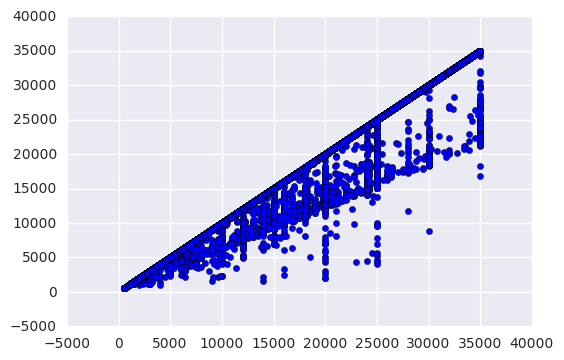

In [39]:
plt.scatter(df.loan_amnt,df.funded_amnt)

plt.show()

In [40]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 2000, height = 1000).generate(' '.join(str(i) for i in df['title']))

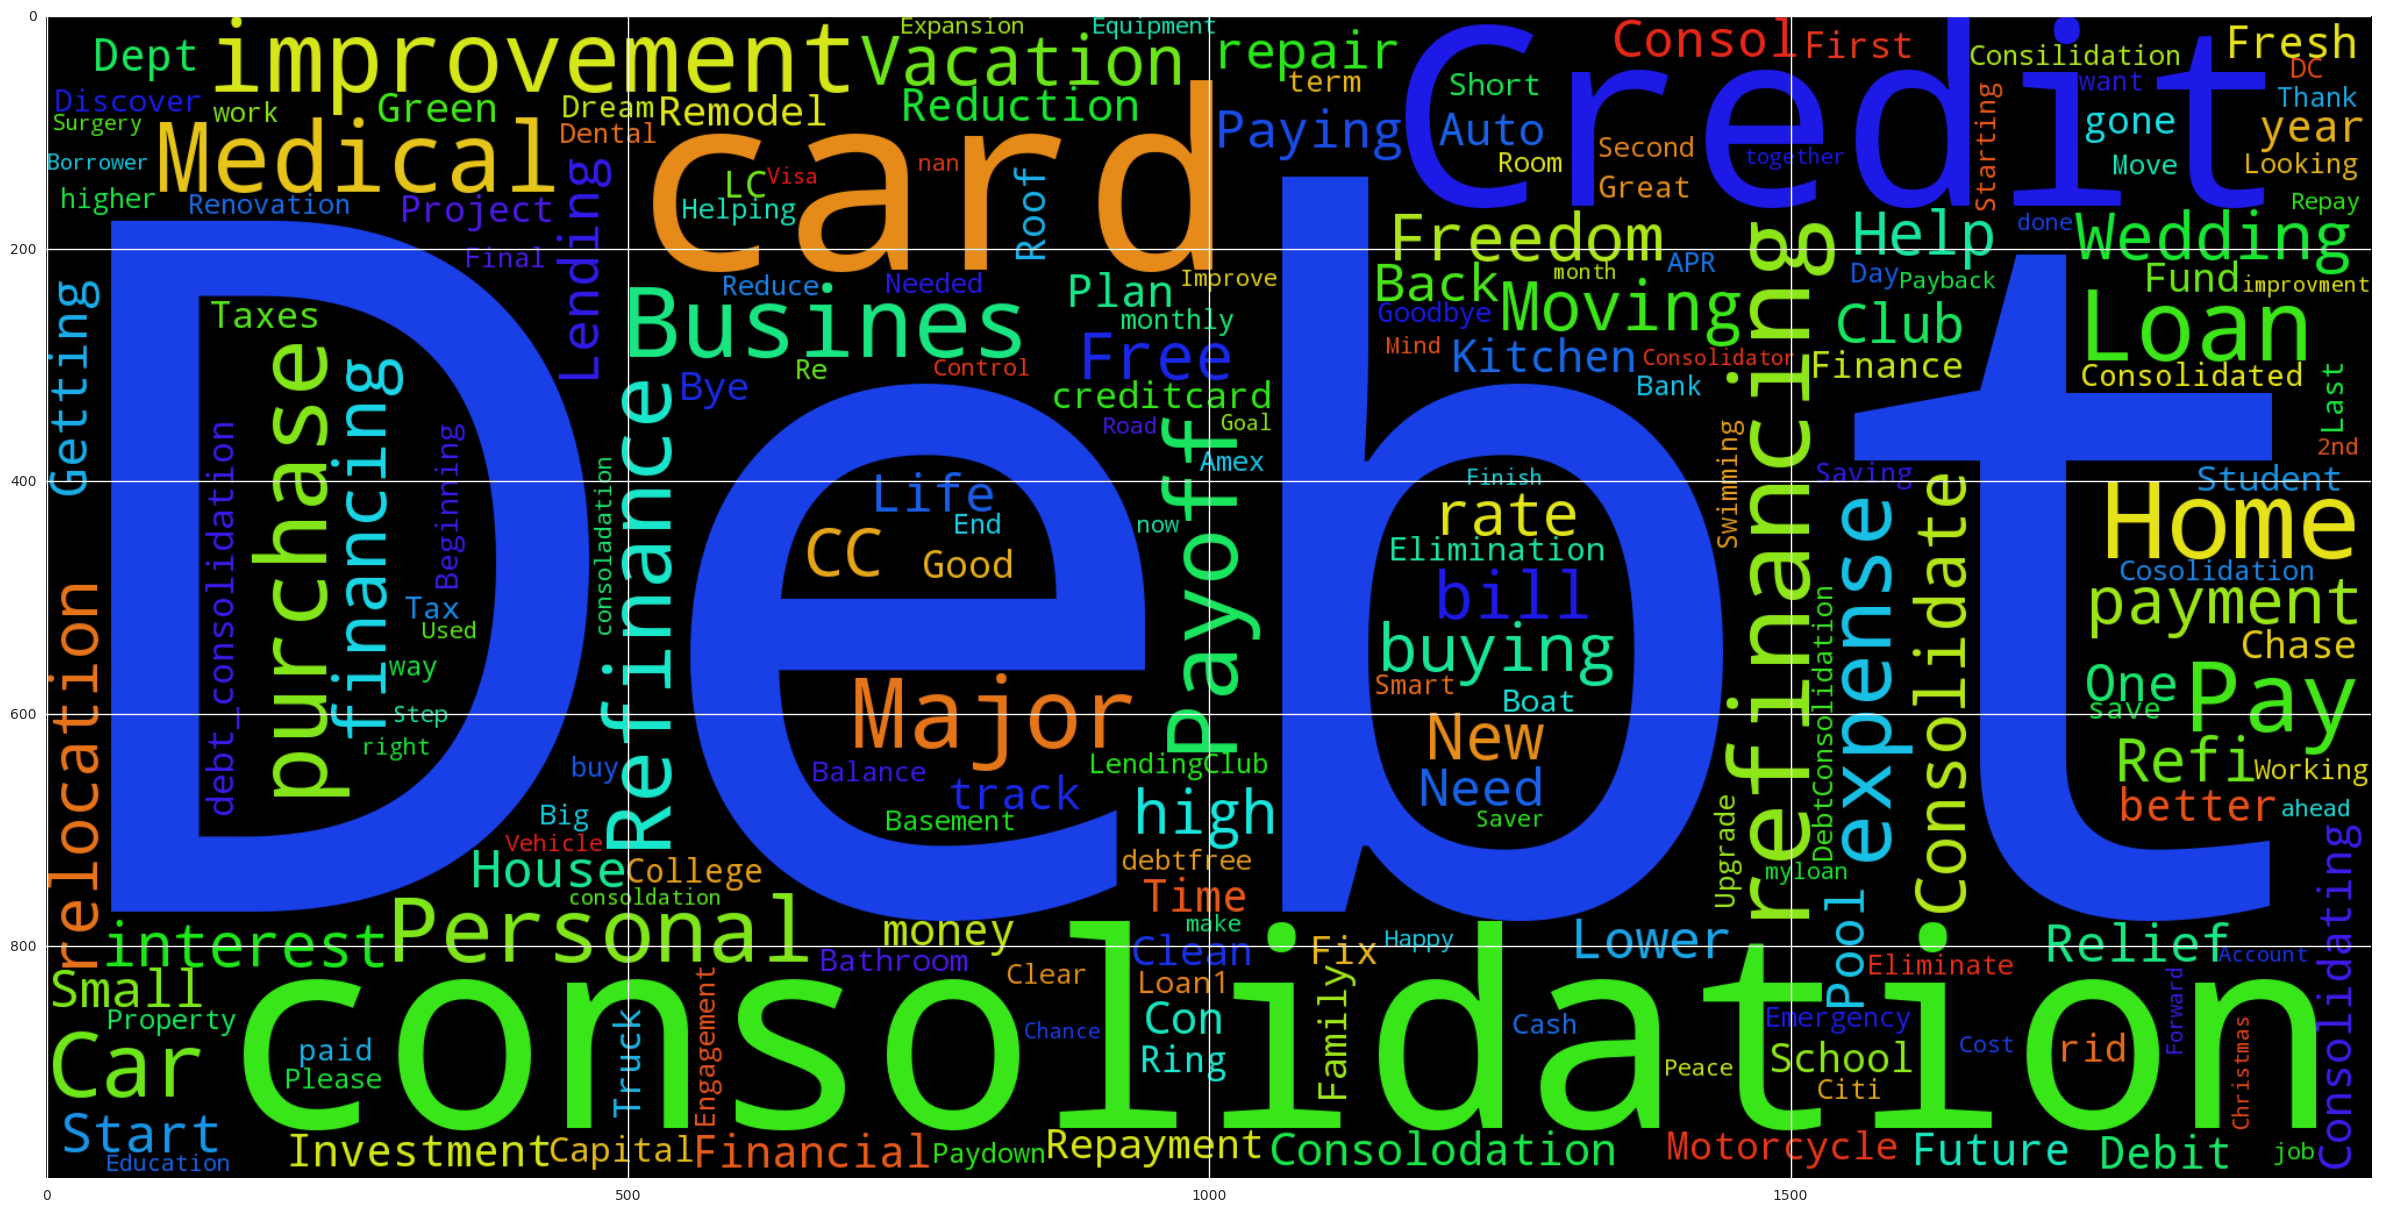

In [41]:
plt.figure(figsize=(30,16))
plt.imshow(wordcloud)

In [42]:
df.describe

<bound method DataFrame.describe of               id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0        1077501    1296599     5000.0       5000.0      4975.000000   
1        1077430    1314167     2500.0       2500.0      2500.000000   
2        1077175    1313524     2400.0       2400.0      2400.000000   
3        1076863    1277178    10000.0      10000.0     10000.000000   
4        1075358    1311748     3000.0       3000.0      3000.000000   
5        1075269    1311441     5000.0       5000.0      5000.000000   
6        1069639    1304742     7000.0       7000.0      7000.000000   
7        1072053    1288686     3000.0       3000.0      3000.000000   
8        1071795    1306957     5600.0       5600.0      5600.000000   
9        1071570    1306721     5375.0       5375.0      5350.000000   
10       1070078    1305201     6500.0       6500.0      6500.000000   
11       1069908    1305008    12000.0      12000.0     12000.000000   
12       1064687    1298717 

In [11]:
states = df.addr_state.unique()

In [12]:
print(states, states.dtype)

(array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME', 'ND'], dtype=object), dtype('O'))


In [13]:
states_count = pd.DataFrame(Counter(df.addr_state).most_common(), columns=['state', 'N'])

In [14]:
print(states);

['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA' 'MN'
 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV' 'AK' 'MD'
 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK' 'DE' 'MS' 'TN'
 'IA' 'NE' 'ID' 'IN' 'ME' 'ND']


In [15]:
df.grade = pd.Categorical(df.grade)
df.loan_amnt = np.float64(df.loan_amnt)
df.annual_inc = np.float64(df.annual_inc)
df.int_rate = np.float64(df.int_rate)
df.total_rec_late_fee = np.float64(df.total_rec_late_fee)
df.dti = np.float64(df.dti)

In [16]:
teacher_median = []
for state in states:
    teacher_median.append([state, df[((df.emp_title == 'Teacher') | (df.emp_title == 'Teacher')) &\
                                        (df.addr_state == state)][['annual_inc']].mean()[0]])

In [17]:
print(teacher_median)

[['AZ', 51992.724678899081], ['GA', 58497.860633914424], ['IL', 68676.925652951715], ['CA', 72754.542586109543], ['OR', 57312.359758064522], ['NC', 49482.795464788731], ['TX', 56376.108667117725], ['VA', 59612.025000000001], ['MO', 54879.450261780104], ['CT', 74930.76470588235], ['UT', 53057.765263157897], ['FL', 51604.240513141427], ['NY', 77176.650084317036], ['PA', 66729.691607929519], ['MN', 62168.089756097565], ['NJ', 75629.677455197132], ['KY', 56435.130466321243], ['OH', 61812.808209606992], ['SC', 53912.588604651151], ['RI', 71428.981818181812], ['LA', 52584.366999999991], ['MA', 70248.870406779679], ['WA', 64532.422054054055], ['WI', 60320.747586206897], ['AL', 55539.028540772524], ['CO', 57757.436428571425], ['KS', 53771.088571428576], ['NV', 64727.451677018638], ['AK', 73918.181818181823], ['MD', 69955.344303405582], ['WV', 53727.693164556957], ['VT', 64013.538461538461], ['MI', 64569.381254355409], ['DC', 74918.0], ['SD', 50500.0], ['NH', 58609.75], ['AR', 52677.96140740740

In [18]:
teacher_median_df = pd.DataFrame(teacher_median, columns=['State', 'Income'])

In [19]:
print(teacher_median_df)

   State        Income
0     AZ  51992.724679
1     GA  58497.860634
2     IL  68676.925653
3     CA  72754.542586
4     OR  57312.359758
5     NC  49482.795465
6     TX  56376.108667
7     VA  59612.025000
8     MO  54879.450262
9     CT  74930.764706
10    UT  53057.765263
11    FL  51604.240513
12    NY  77176.650084
13    PA  66729.691608
14    MN  62168.089756
15    NJ  75629.677455
16    KY  56435.130466
17    OH  61812.808210
18    SC  53912.588605
19    RI  71428.981818
20    LA  52584.367000
21    MA  70248.870407
22    WA  64532.422054
23    WI  60320.747586
24    AL  55539.028541
25    CO  57757.436429
26    KS  53771.088571
27    NV  64727.451677
28    AK  73918.181818
29    MD  69955.344303
30    WV  53727.693165
31    VT  64013.538462
32    MI  64569.381254
33    DC  74918.000000
34    SD  50500.000000
35    NH  58609.750000
36    AR  52677.961407
37    NM  55785.111111
38    MT  52878.154222
39    HI  57101.801633
40    WY  65959.267857
41    OK  48747.686818
42    DE  6

In [30]:
type(df.title)

pandas.core.series.Series

In [31]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 2000, height = 1000).generate(' '.join(str(i) for i in df['title']))

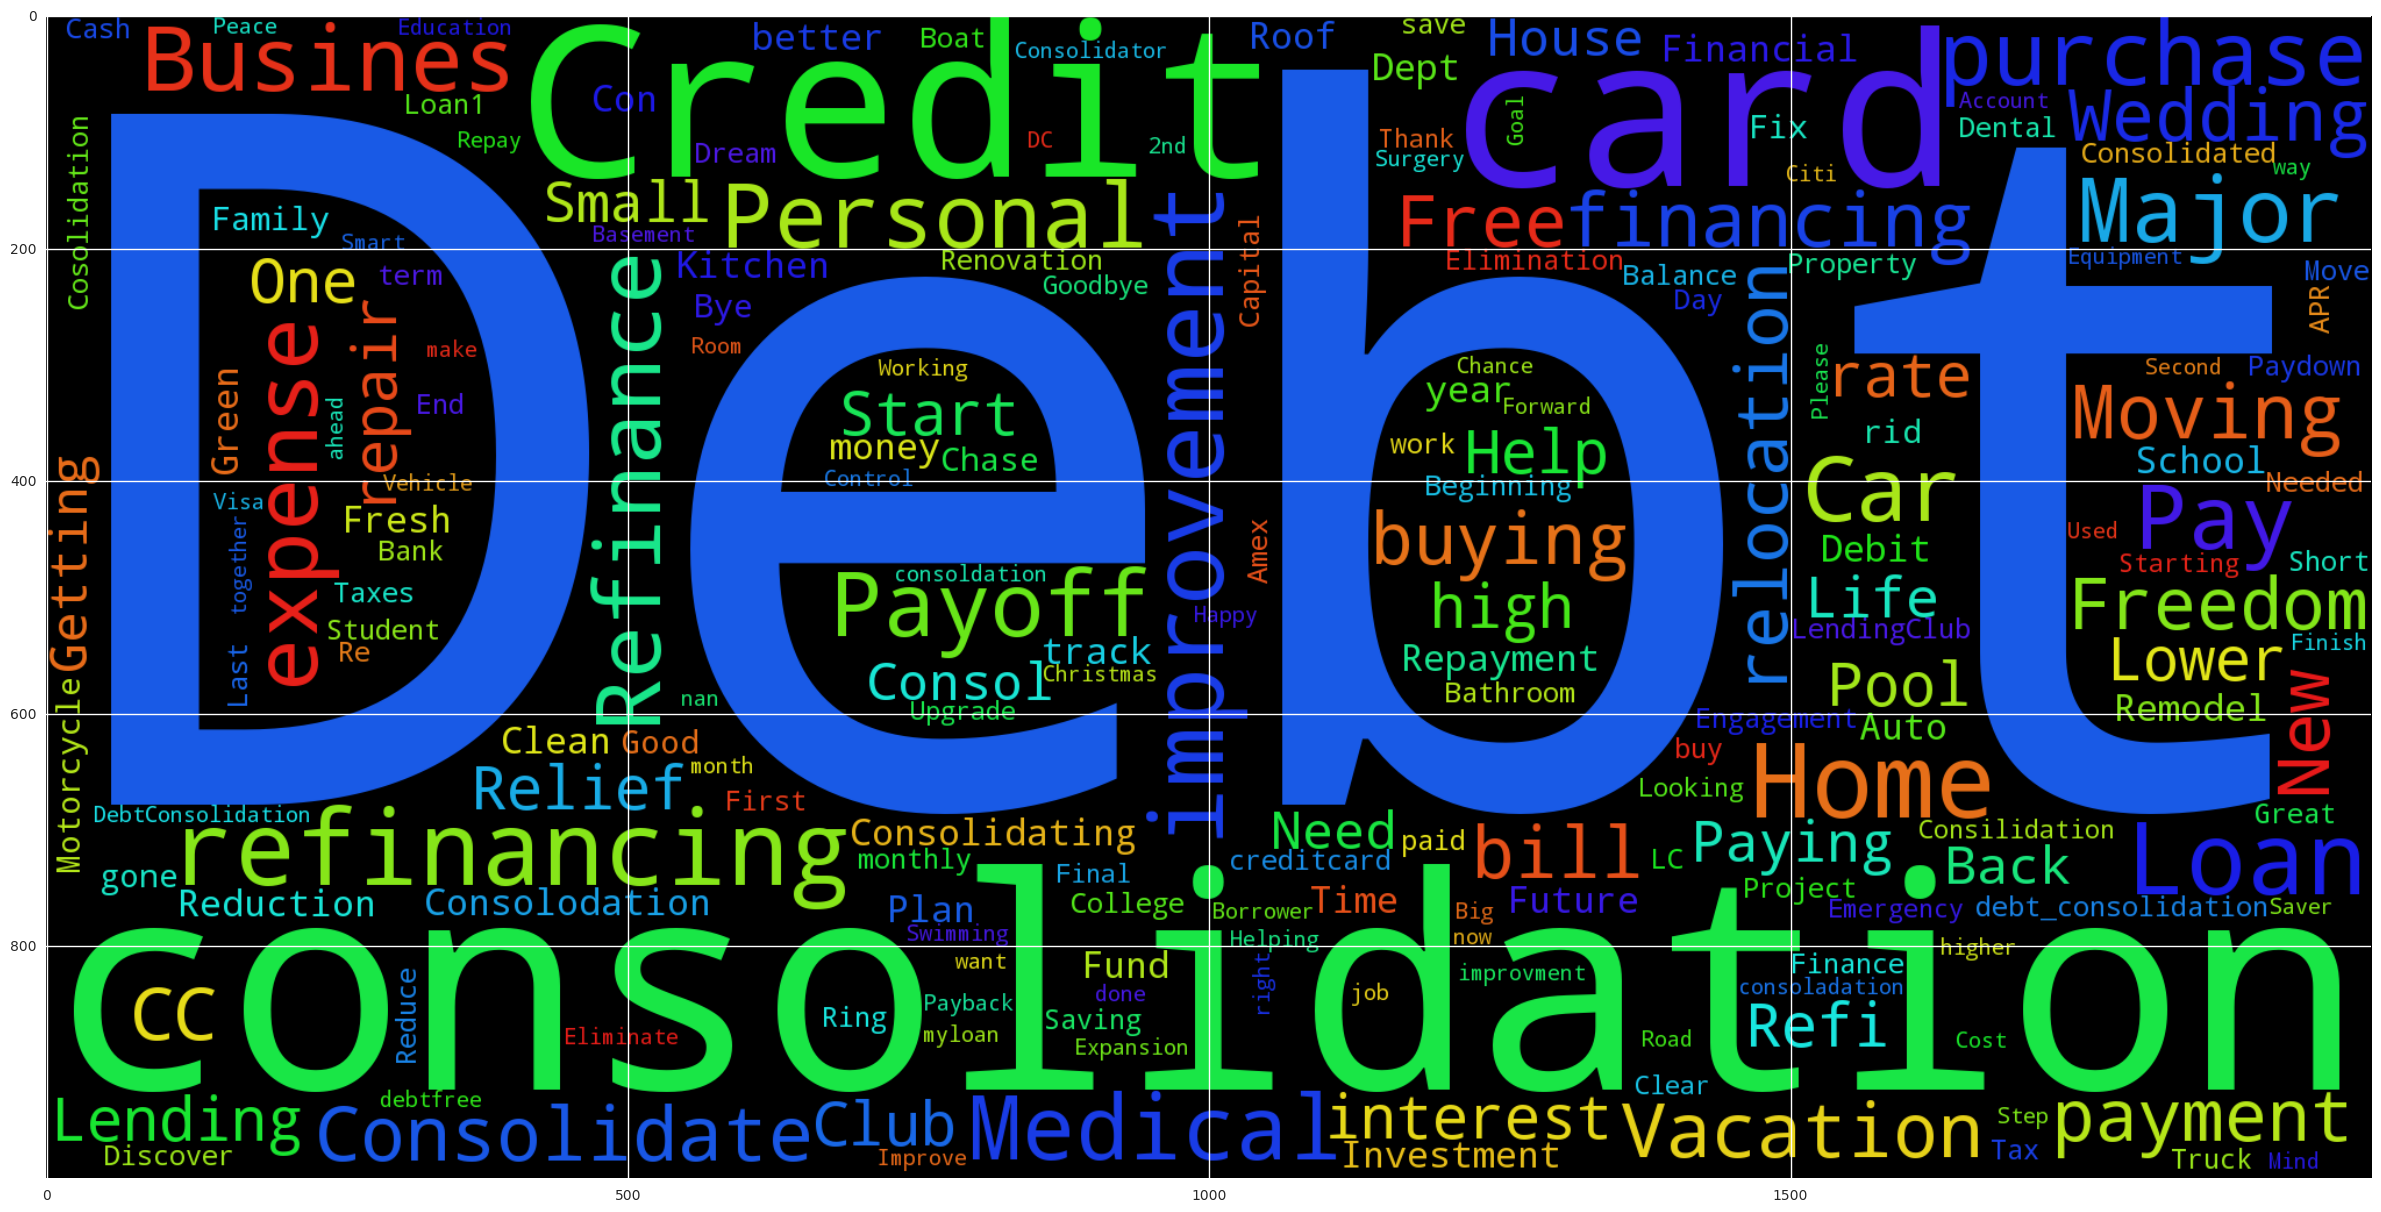

In [33]:
plt.figure(figsize=(30,16))
plt.imshow(wordcloud)

In [ ]:
print(State_meanLoan)

In [ ]:
Sum_State_loan_amount= [ state + "duck" for state in states ]

In [ ]:
print (Sum_State_loan_amount)

In [ ]:
State_meanLoan.sort()

In [ ]:
print(State_meanLoan)

In [ ]:
State_meanLoan[2]